# What is Binning:

- Binning, also known as bucketing, is a data preprocessing technique in machine learning used to group continuous numerical variables into discrete intervals or "bins".

- Each data point is then assigned a label (or) value corresponding to the bin into which it falls.

## Why do we use Binning:

- Reduce noise in data
- Handle outliers
- Simplify complex data
- Improve model intterpretablility
- Convert continuous -> Categories

## Used in:

- Decission Trees
- Rule-based models
- Business analytics
- Credit scoring, grading systems

## Types of Binning:
- Equal-width Binning(Distance Binning)
- Equal-Frequency Binning(Quantile Binning)
- Custom / Domain-Based Binning

## 1. Equal-Width Binning(Distance Binning):
- Equal-Width Binning divides the entire range of a continuous variable into a fixed number of bins, where is each bin has the same width(Distance)
- This method does not consider how data is distributed inside the range. It only focuses on the minimum and maximum values.
## Formulae:
- Bin Width = (max-min)/k
## Example:
[18,22,25,30,35,40,45,50]

- min=18

- max=50

- k=4

Where, k= number of Bins

- Bin_Width= (50-18)/4 = 32/4 = 8

## Bins:
- 18-26
- 26-34
- 34-42
- 42-50
## Key Points
- Count difference
- Range Same


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
data = pd.DataFrame({
    "age":[18,22,25,30,35,40,45,50]
})
data

,age
0,18
1,22
2,25
3,30
4,35
5,40
6,45
7,50


# Equal-Width

In [17]:
data["age_bin"]= pd.cut(data["age"], bins=3)
data

,age,age_bin
0,18,"(17.968, 28.667]"
1,22,"(17.968, 28.667]"
2,25,"(17.968, 28.667]"
3,30,"(28.667, 39.333]"
4,35,"(28.667, 39.333]"
5,40,"(39.333, 50.0]"
6,45,"(39.333, 50.0]"
7,50,"(39.333, 50.0]"


<function matplotlib.pyplot.show(close=None, block=None)>

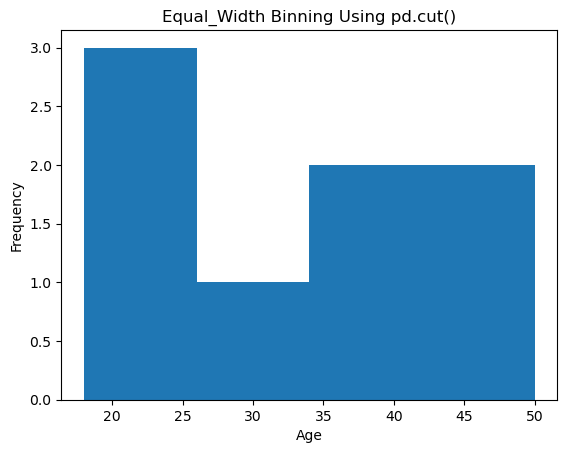

In [19]:
plt.hist(data["age"], bins=4)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Equal_Width Binning Using pd.cut()")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

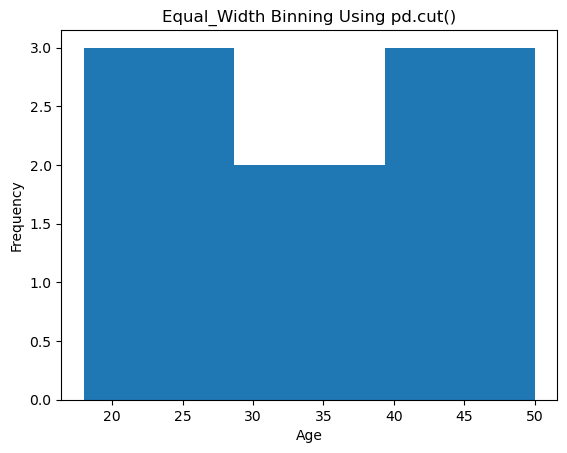

In [21]:
plt.hist(data["age"], bins=3)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Equal_Width Binning Using pd.cut()")
plt.show

## 2. Equal-Frequency Binning(Quantile Binning):
- Equal-Frequency Binning divides the data into bins contains approximately the same number of observations.
- This methods uses data distribution and is based on quantiles(Percentails).
## Formulae:
- Total Observations = n

- Number of bins = k

## Observations per bin:
- n/k

## Examples:
[18,22,25,30,35,40,45,50]

## Observations per bin:
- 8/4 = 2

## Bins:
- First 2 Values -> Bin 1
- Next 2 values -> Bin 2
- Next 2 values -> Bin 3
- Next 2 values -> Bin 4
## Key Points
- Count Same
- Range Difference


In [3]:
import pandas as pd
data = pd.DataFrame({
    "age":[18,22,25,30,35,40,45,50]
})
data

,age
0,18
1,22
2,25
3,30
4,35
5,40
6,45
7,50


In [5]:
data["age_frequency_bin"]=pd.qcut(data["age"],q=4)
data

,age,age_frequency_bin
0,18,"(17.999, 24.25]"
1,22,"(17.999, 24.25]"
2,25,"(24.25, 32.5]"
3,30,"(24.25, 32.5]"
4,35,"(32.5, 41.25]"
5,40,"(32.5, 41.25]"
6,45,"(41.25, 50.0]"
7,50,"(41.25, 50.0]"


<function matplotlib.pyplot.show(close=None, block=None)>

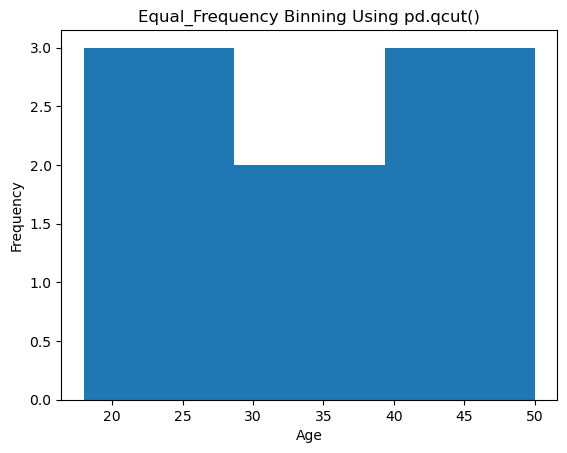

In [9]:
import matplotlib.pyplot as plt
plt.hist(data["age"], bins=3)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Equal_Frequency Binning Using pd.qcut()")
plt.show

In [11]:
bin_min=data["age"].groupby(data["age_frequency_bin"]).min()
bin_min

C:\Users\raidu\AppData\Local\Temp\ipykernel_17488\3652160047.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_min=data["age"].groupby(data["age_frequency_bin"]).min()


age_frequency_bin
(17.999, 24.25]    18
(24.25, 32.5]      25
(32.5, 41.25]      35
(41.25, 50.0]      45
Name: age, dtype: int64

In [13]:
bin_max=data["age"].groupby(data["age_frequency_bin"]).max()
bin_max

C:\Users\raidu\AppData\Local\Temp\ipykernel_17488\176944191.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_max=data["age"].groupby(data["age_frequency_bin"]).max()


age_frequency_bin
(17.999, 24.25]    22
(24.25, 32.5]      30
(32.5, 41.25]      40
(41.25, 50.0]      50
Name: age, dtype: int64

In [15]:
bin_mean=data["age"].groupby(data["age_frequency_bin"]).mean()
bin_mean

C:\Users\raidu\AppData\Local\Temp\ipykernel_17488\3351663183.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_mean=data["age"].groupby(data["age_frequency_bin"]).mean()


age_frequency_bin
(17.999, 24.25]    20.0
(24.25, 32.5]      27.5
(32.5, 41.25]      37.5
(41.25, 50.0]      47.5
Name: age, dtype: float64

In [17]:
bin_median=data["age"].groupby(data["age_frequency_bin"]).median()
bin_median

C:\Users\raidu\AppData\Local\Temp\ipykernel_17488\1428814045.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_median=data["age"].groupby(data["age_frequency_bin"]).median()


age_frequency_bin
(17.999, 24.25]    20.0
(24.25, 32.5]      27.5
(32.5, 41.25]      37.5
(41.25, 50.0]      47.5
Name: age, dtype: float64

## Custom/Domain-Based Binning

- Custom Binning uses predefined bin boundries based on domain knowledge,business rules,or external standards.
- This method is not data-driven,but context-driven.

## Example(Age Groups)

## Bins:
- 18-25->Young
- 25-60->Adult
- 60-100->Senior

- These Boundries come from real-world meaning,not calculations.

In [49]:
custom_bins=[17,25,35,50]
labels=["Young","Adult","Senior"]

bins=pd.cut(data["age"],bins=custom_bins,labels=labels)
bins

0     Young
1     Young
2     Young
3     Adult
4     Adult
5    Senior
6    Senior
7    Senior
Name: age, dtype: category
Categories (3, object): ['Young' < 'Adult' < 'Senior']

In [55]:
custom_bins=[15,20,25,35,50]
labels=["Child","Young","Adult","Senior"]

bins=pd.cut(data["age"],bins=custom_bins,labels=labels)
bins

0     Child
1     Young
2     Young
3     Adult
4     Adult
5    Senior
6    Senior
7    Senior
Name: age, dtype: category
Categories (4, object): ['Child' < 'Young' < 'Adult' < 'Senior']

<function matplotlib.pyplot.show(close=None, block=None)>

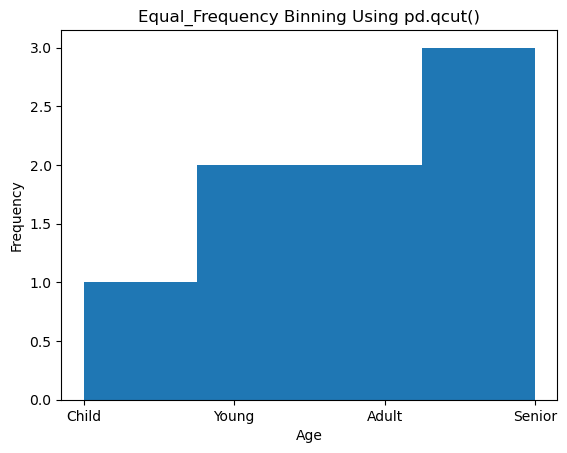

In [57]:
plt.hist(bins, bins=4)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Equal_Frequency Binning Using pd.qcut()")
plt.show